Data Set Information:

•	The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
•	Acquisition date: January 8, 2015
•	The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

•	Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Ingestion:

In [2]:
pop = pd.read_csv('OnlineNewsPopularity.csv')
pop_raw = pop.copy()
pop.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
pop.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [5]:
def details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Types'] = df.dtypes
    b['Number of unique values'] = df.nunique()
    return b

In [6]:
details(pop)

,Null Values,Data Types,Number of unique values
url,0,object,39644
timedelta,0,float64,724
n_tokens_title,0,float64,20
n_tokens_content,0,float64,2406
n_unique_tokens,0,float64,27281
n_non_stop_words,0,float64,1451
n_non_stop_unique_tokens,0,float64,22930
num_hrefs,0,float64,133
num_self_hrefs,0,float64,59
num_imgs,0,float64,91


In [7]:
(pop.isnull().any())

url                               False
 timedelta                        False
 n_tokens_title                   False
 n_tokens_content                 False
 n_unique_tokens                  False
 n_non_stop_words                 False
 n_non_stop_unique_tokens         False
 num_hrefs                        False
 num_self_hrefs                   False
 num_imgs                         False
 num_videos                       False
 average_token_length             False
 num_keywords                     False
 data_channel_is_lifestyle        False
 data_channel_is_entertainment    False
 data_channel_is_bus              False
 data_channel_is_socmed           False
 data_channel_is_tech             False
 data_channel_is_world            False
 kw_min_min                       False
 kw_max_min                       False
 kw_avg_min                       False
 kw_min_max                       False
 kw_max_max                       False
 kw_avg_max                       False


There are no null values present in the dataset, we can proceed with further analysis

In [8]:
pop.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [9]:
pop.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [10]:
pop.corr()[' shares']

 timedelta                        0.008662
 n_tokens_title                   0.008783
 n_tokens_content                 0.002459
 n_unique_tokens                  0.000806
 n_non_stop_words                 0.000443
 n_non_stop_unique_tokens         0.000114
 num_hrefs                        0.045404
 num_self_hrefs                  -0.001900
 num_imgs                         0.039388
 num_videos                       0.023936
 average_token_length            -0.022007
 num_keywords                     0.021818
 data_channel_is_lifestyle        0.005831
 data_channel_is_entertainment   -0.017006
 data_channel_is_bus             -0.012376
 data_channel_is_socmed           0.005021
 data_channel_is_tech            -0.013253
 data_channel_is_world           -0.049497
 kw_min_min                      -0.001051
 kw_max_min                       0.030114
 kw_avg_min                       0.030406
 kw_min_max                       0.003901
 kw_max_max                       0.007863
 kw_avg_max

From the 5 point summary of the dataset we can infer that there are outliers present in the dataset. Also from the url variable we can extract date which can be useful for the prediction of shares.

Also from the correlation table we can see that timedelta is not a useful column so we can drop it as it is also a non predictive column.

As shares has median threshold of 1400 we can divide shares in 2 class <1400 and >=1400, therefore proceeding futher with analysis

In [11]:
popularity = pop[' shares'] >= 1400	
nopopularity = pop[' shares'] < 1400

pop.loc[popularity,' shares'] = 1
pop.loc[nopopularity,' shares'] = 0

In [12]:
pop[' shares'].value_counts()

1    21154
0    18490
Name:  shares, dtype: int64

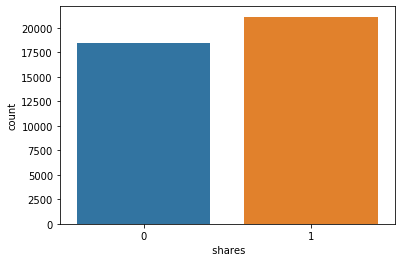

In [13]:
sns.countplot(pop[' shares'])
plt.show()

There is a proper distribution of the popularity of the articles that were published on the mashable.com

# 2. Split Data set:

In [14]:
pop.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [15]:
pop1 = pop[[' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']]

dropping url and timedelta as they are non predictive variables

In [16]:
x = pop1.drop(columns=' shares')
y = pop1[' shares']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

# 3. Build a base model:

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic = LogisticRegression(n_jobs=-1)
model = logistic.fit(x_train,y_train)
ypred = model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,ypred)
print(cm)

[[2953 2521]
 [2135 4285]]


In [21]:
accuracy = accuracy_score(y_test,ypred)* 100
print('The Accuracy score is : ',accuracy)

The Accuracy score is :  60.85421220783588


In [22]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      5474
           1       0.63      0.67      0.65      6420

    accuracy                           0.61     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.61      0.61      0.61     11894



In [23]:
print('Precision is: ',precision_score(y_test,ypred))
print('Recall is: ',recall_score(y_test, ypred))
print('F1 Score is: ',f1_score(y_test,ypred))

Precision is:  0.6295915368792242
Recall is:  0.6674454828660437
F1 Score is:  0.647966127324966


Accuracy score is 60% which can be increased using PCA for dimentionality reduction for better accuracy of the model.
Also next steps of EDA will be done in furthere analysis of the data.

# 4. EDA -  Plots:

In [24]:
df =pop.drop(columns=['url',' timedelta'])

In [25]:
def box(df):
    for i in df.columns:
        sns.boxplot(df[i])
        plt.show()

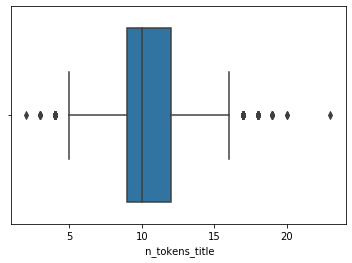

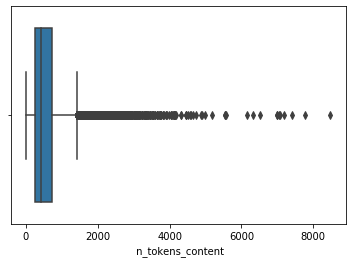

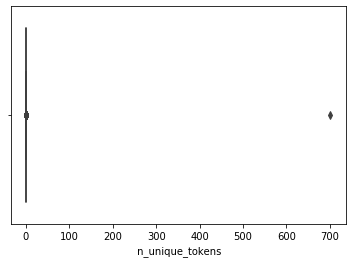

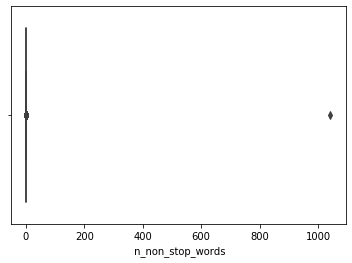

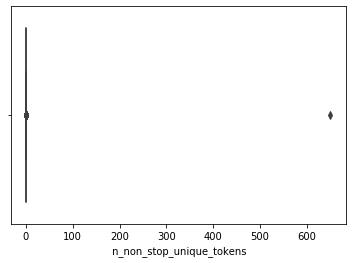

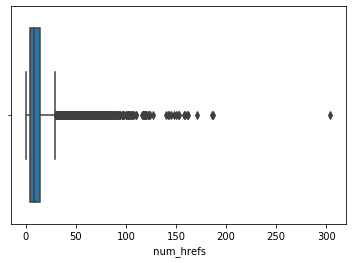

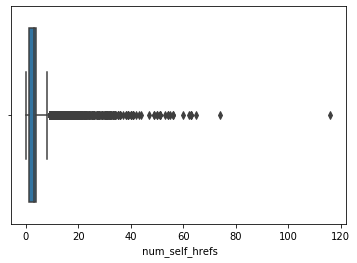

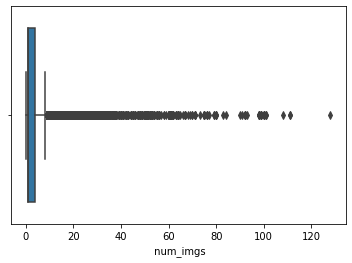

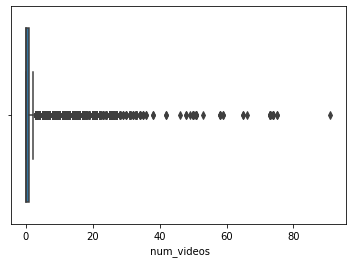

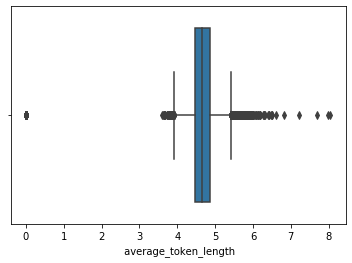

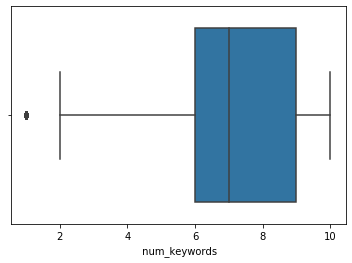

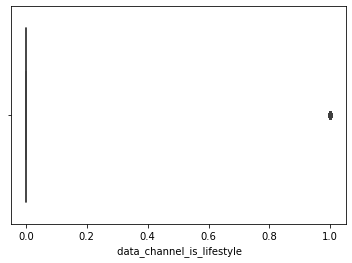

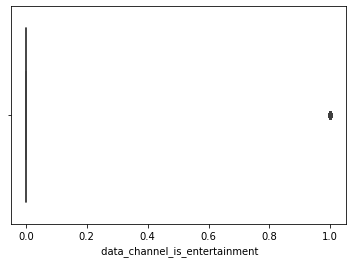

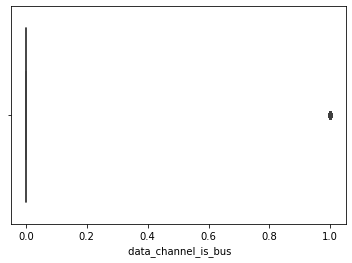

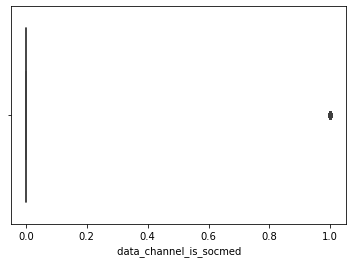

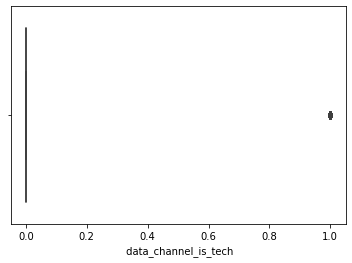

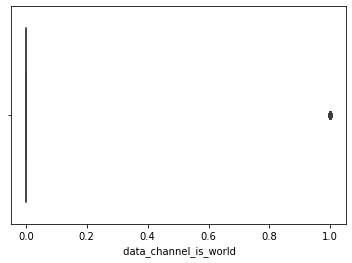

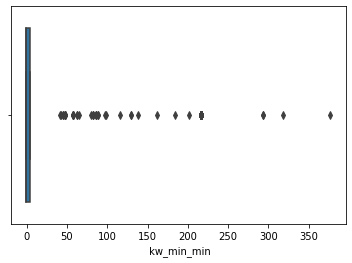

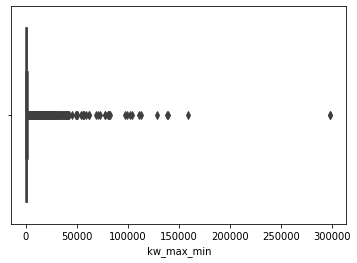

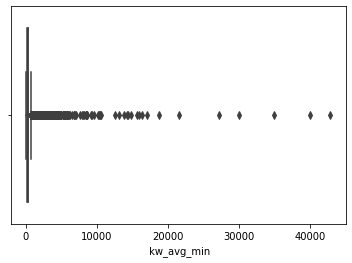

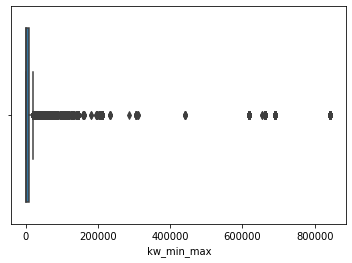

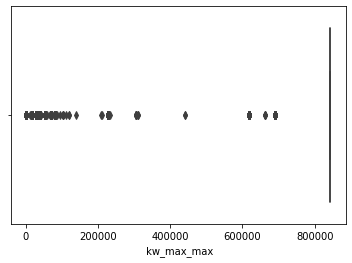

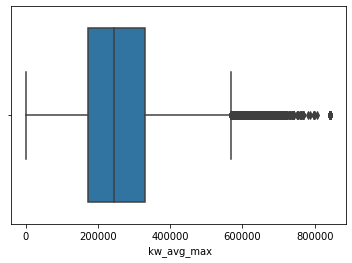

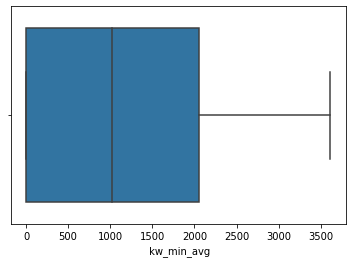

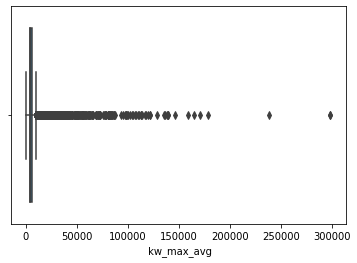

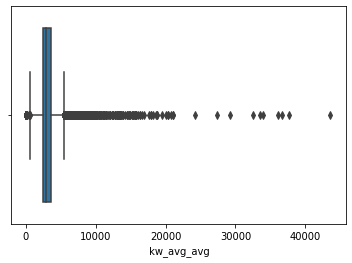

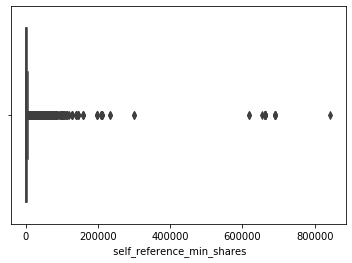

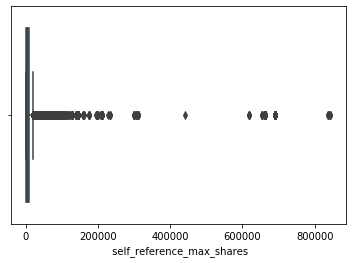

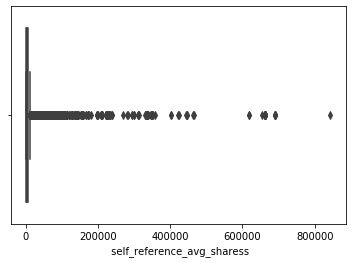

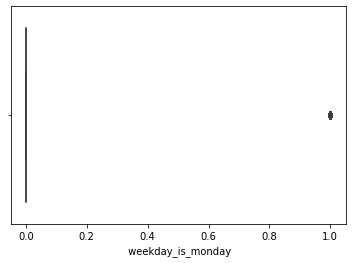

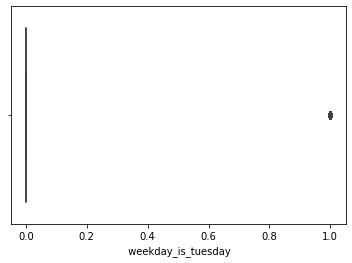

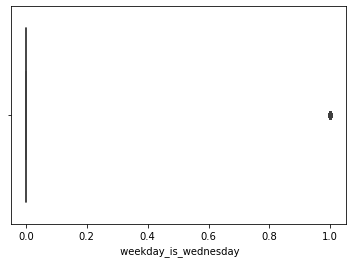

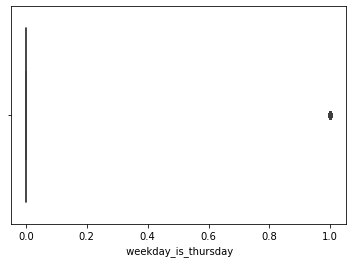

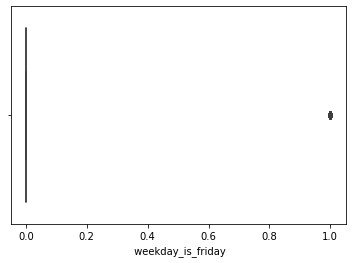

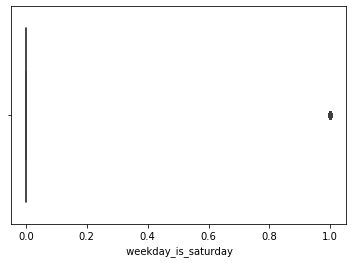

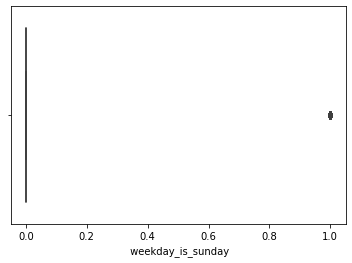

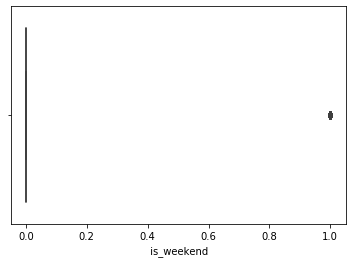

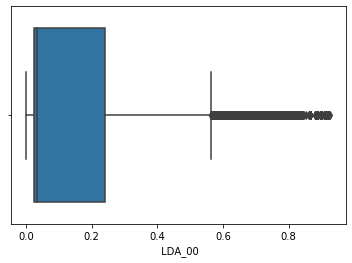

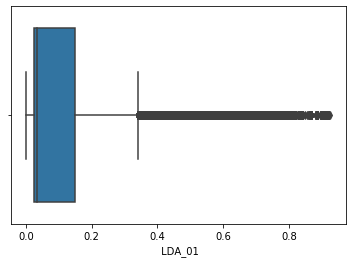

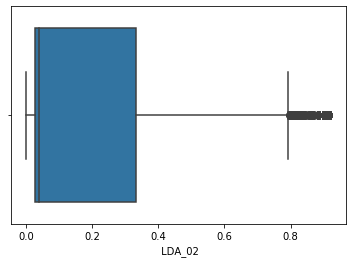

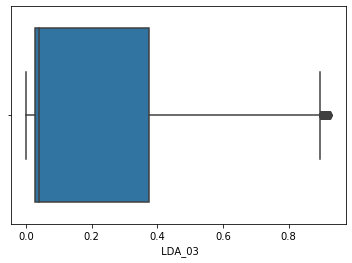

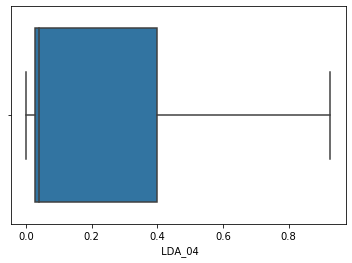

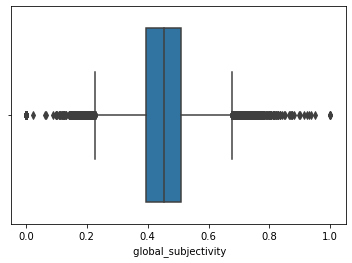

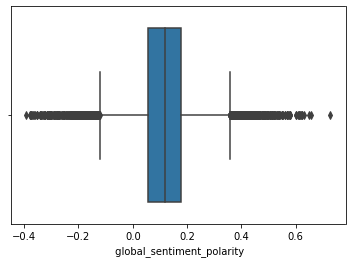

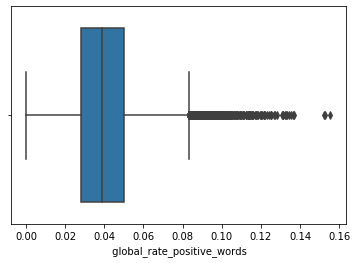

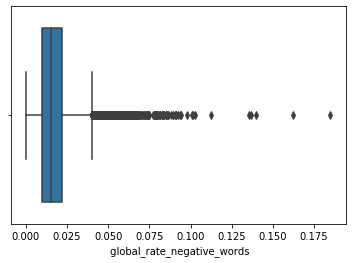

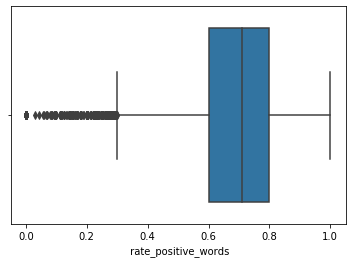

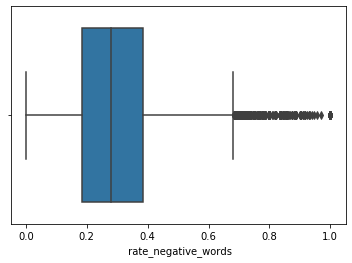

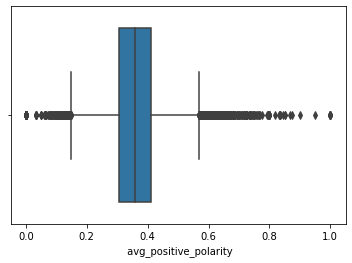

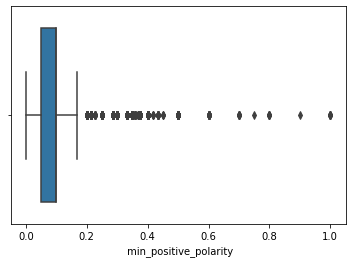

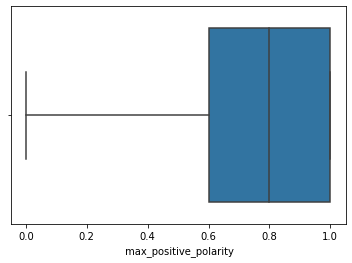

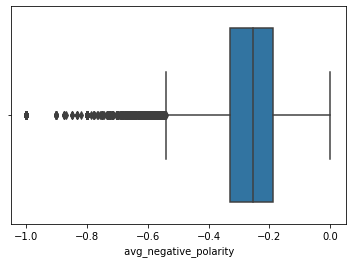

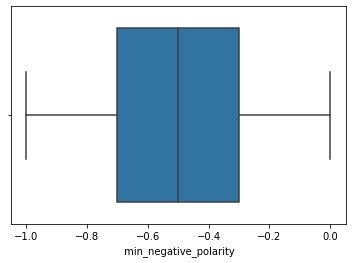

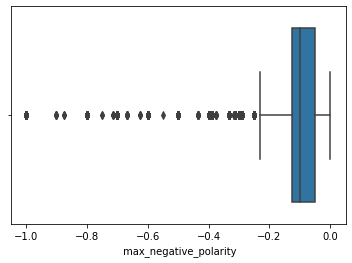

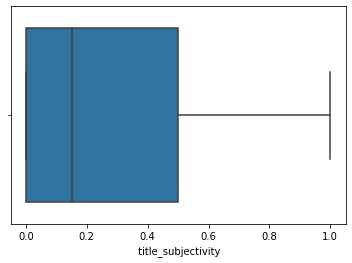

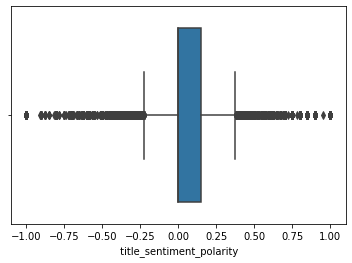

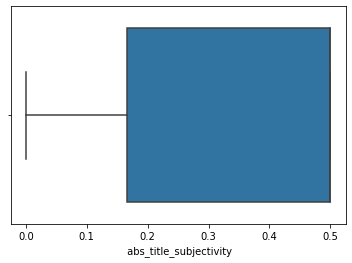

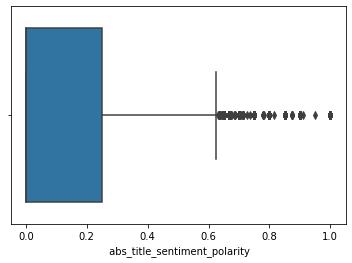

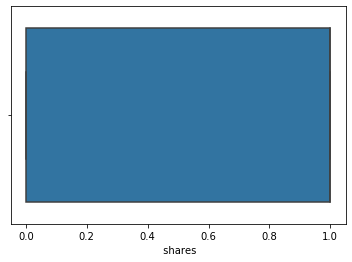

In [26]:
box(df)

There are outliers present in the dataset, still not proceeding with outlier removal as the dataset is small, only 39644 rows.

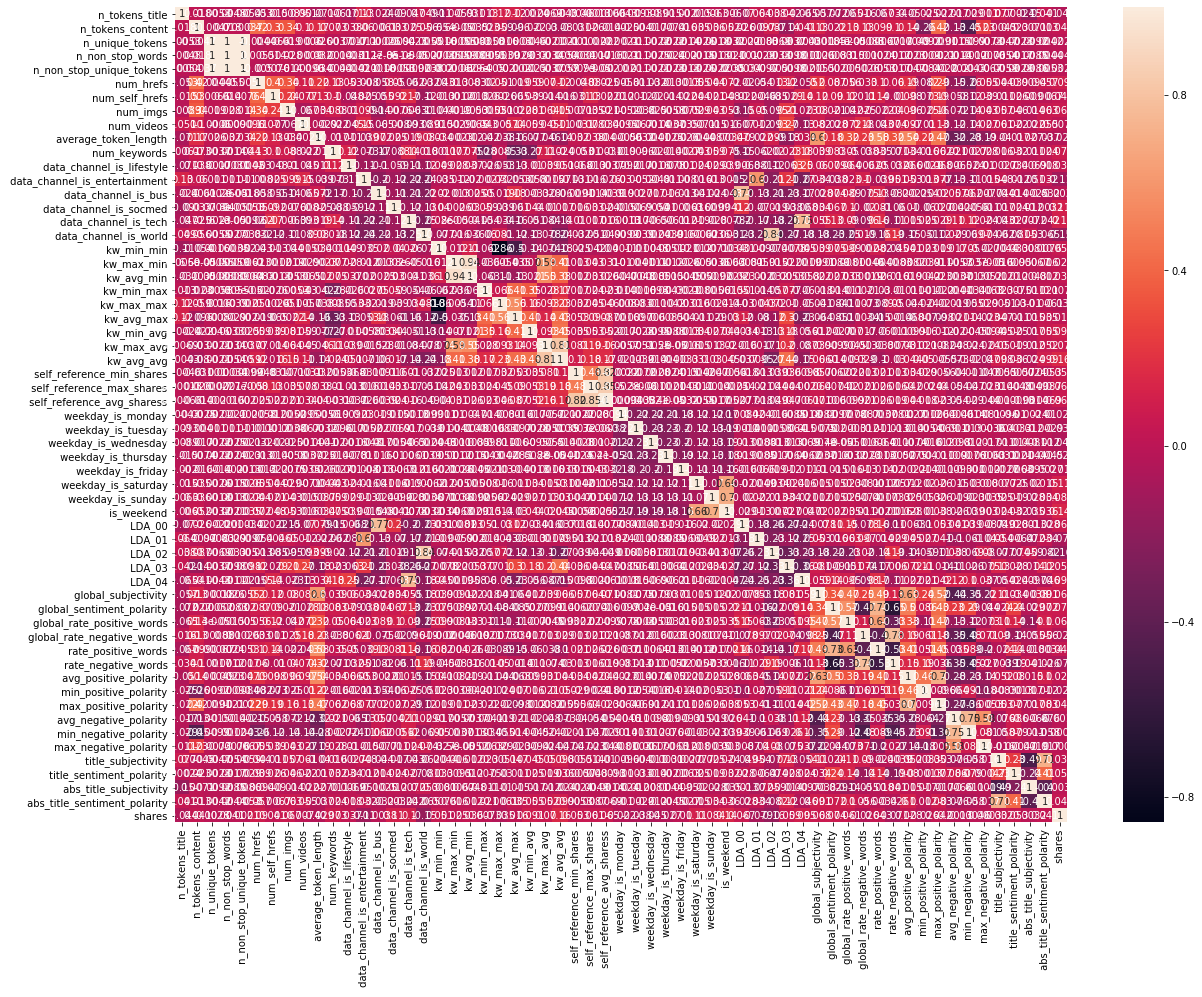

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
# def scatterr():
#     for i in df.columns:
#         plt.figure(figsize=(15,5))
#         sns.scatterplot(x=' shares',y=i, data=df, color='blue')
#         plt.show()

As all the values of the all the variables are binary therefore there are no scatter plots

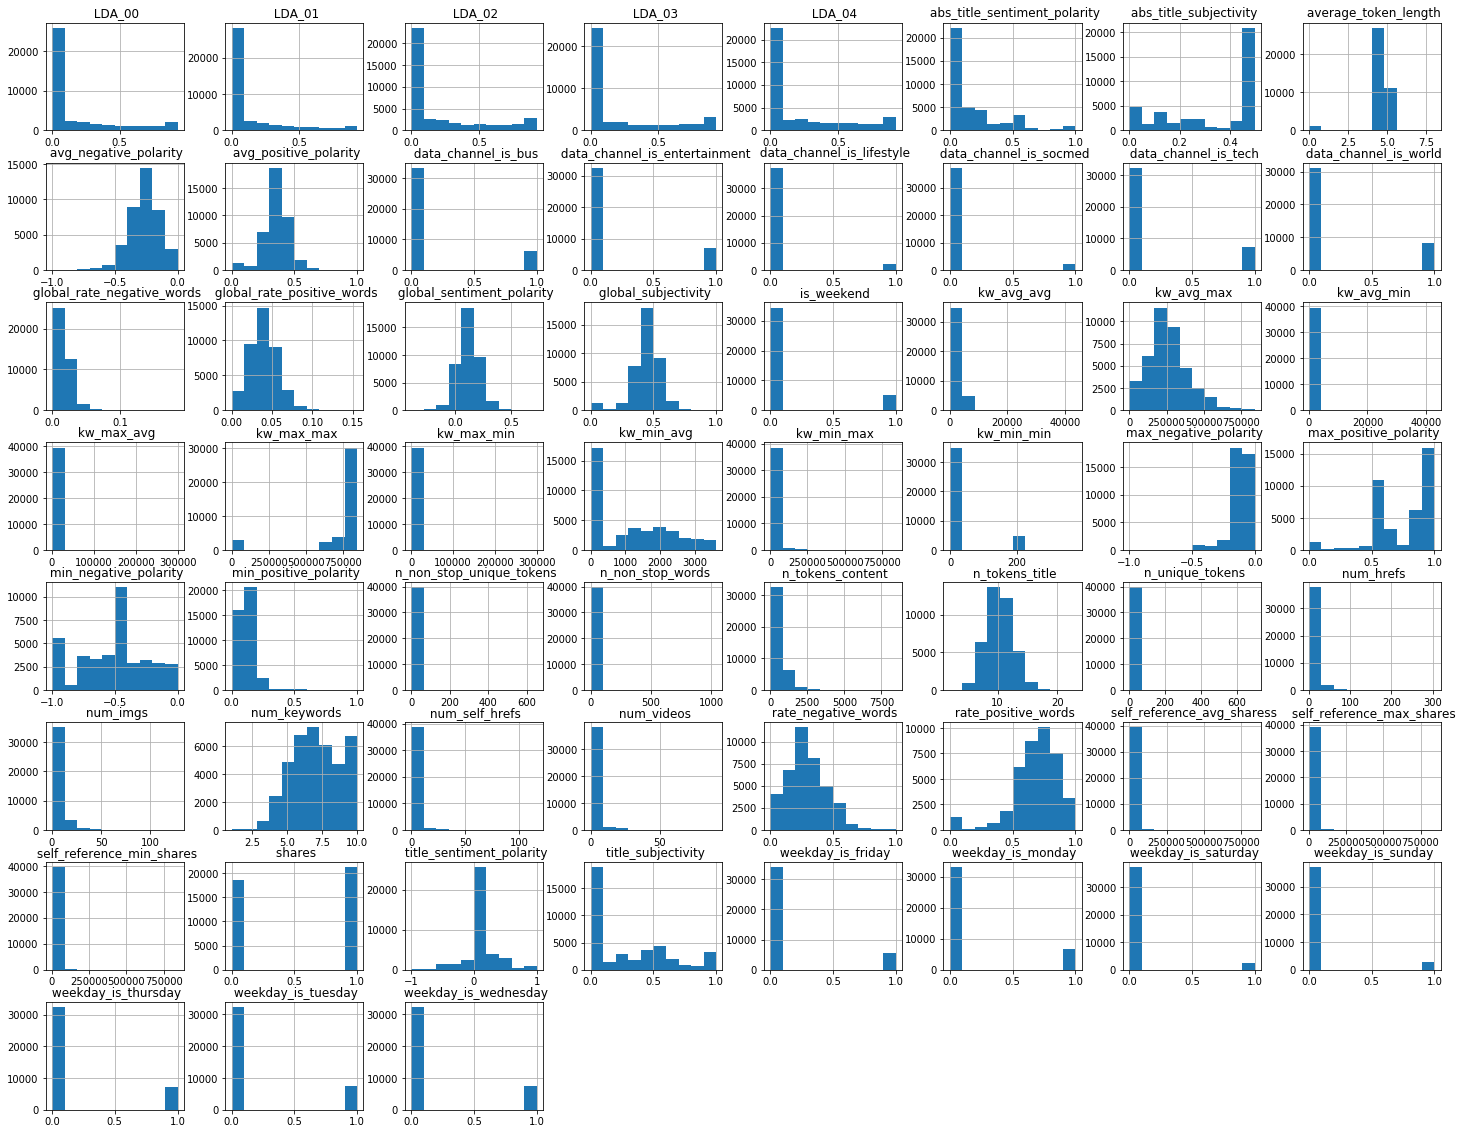

In [29]:
df.hist(figsize=(25,20))
plt.show()

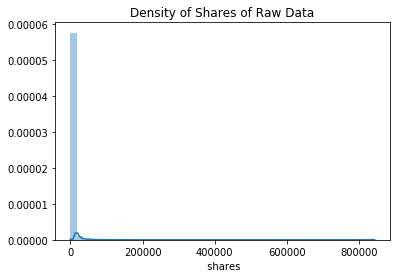

In [30]:
sns.distplot(pop_raw[' shares'])
plt.title('Density of Shares of Raw Data')
plt.show()

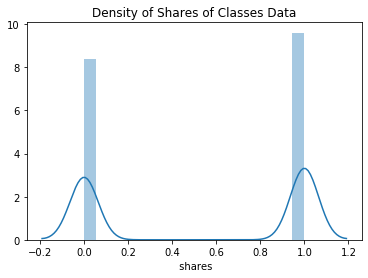

In [31]:
sns.distplot(pop[' shares'])
plt.title('Density of Shares of Classes Data')
plt.show()

# 5. EDA - Inference:

1. There are outliers present in the dataset, still not proceeding with outlier removal as the dataset is small, only 39644 rows.
2. As all the values of the all the variables are binary therefore there are no scatter plots.
3. We can also see the behaviour of the transformed target variable into a binary class for better classification model.


# 6.  Label Encoding / Get Dummies:

As there are no variables which can be classified as categorical variable, therefore not going forward with Label Encoding / Get Dummies.

# 7.  Data handling:

Data has no null values or any imputation is not required and the target variable is a balanced variable.

# 8.  Feature selection and Feature engineering

Three new variables can be extracted from the url variable which is yr, month and day 

In [32]:
data = pop_raw.copy()
# data.url = [x.strip().replace('http://mashable.com/', '') for x in data.url]
data['date'] = [x[20:30] for x in data.url]

In [33]:
data['date'] = pd.to_datetime(data['date'])

In [34]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [35]:
popularity = data[' shares'] >= 1400	
nopopularity = data[' shares'] < 1400

data.loc[popularity,' shares'] = 1
data.loc[nopopularity,' shares'] = 0

In [36]:
data.drop(columns = ['url', ' timedelta','date'],inplace=True)

In [37]:
x = data.drop(columns=' shares')
y = data[' shares']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [39]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(n_jobs=-1)
model = logistic.fit(x_train,y_train)

In [40]:
ypred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
print(cm)

[[3083 2391]
 [2209 4211]]


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,ypred)* 100
print('The Accusracy score is : ',accuracy)

The Accusracy score is :  61.32503783420212


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      5474
           1       0.64      0.66      0.65      6420

    accuracy                           0.61     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.61      0.61      0.61     11894



In [44]:
print('Precision is: ',precision_score(y_test,ypred))
print('Recall is: ',recall_score(y_test, ypred))
print('F1 Score is: ',f1_score(y_test,ypred))

Precision is:  0.6378370190851257
Recall is:  0.6559190031152647
F1 Score is:  0.6467516510520657


As seen from the feature extraction from url variable we can see the accuracy has increased by approx 0.5% therefore the variables are helping to build the model better

### Principal Component Analysis

In [45]:
# x_train.info()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
from sklearn.decomposition import PCA

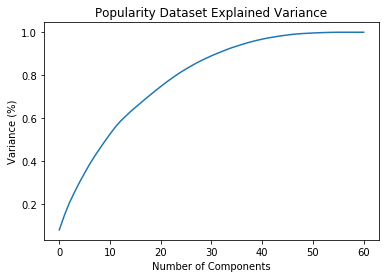

In [49]:
#Fitting the PCA algorithm with our Data
pca = PCA()
model_pca = pca.fit(x_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Popularity Dataset Explained Variance')
plt.show()

In [50]:
compo=46
compo

46

In [51]:
model_pca = PCA(n_components=compo,svd_solver='full')

new_train = model_pca.fit_transform(x_train_scaled)
new_test  = model_pca.transform(x_test_scaled)

print('\nTraining model with {} dimensions.'.format(new_train.shape[1]))



Training model with 46 dimensions.


In [52]:
new_train.shape

(27750, 46)

In [53]:
new_test.shape

(11894, 46)

# 9.  Logistic, decision tree, KNN, Naïve Bayes

## Logistic

In [54]:
logistic = LogisticRegression()
model = logistic.fit(new_train,y_train)

In [55]:
y_pred = model.predict(new_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3273 2201]
 [1961 4459]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test,y_pred)* 100
print('The Accuracy score is : ',accuracy_log)

The Accuracy score is :  65.00756684042375


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      5474
           1       0.67      0.69      0.68      6420

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



In [59]:
log_prec = precision_score(y_test,y_pred)
log_rec = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)
print('Precision is: ',log_prec)
print('Recall is: ',log_rec)
print('F1 Score is: ',log_f1)

Precision is:  0.6695195195195195
Recall is:  0.6945482866043614
F1 Score is:  0.6818042813455658


## Decision Tree

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],
    'random_state':range(0,101)
}

n_folds = 10

# Instantiate the randomized search model
dtree = DecisionTreeClassifier()
random_cv = RandomizedSearchCV(estimator=dtree,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=45)

# Fit the randomized search to the data
random_cv.fit(new_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [61]:
print("best accuracy", random_cv.best_score_)

best accuracy -0.38673873873873876


In [62]:
print(random_cv.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


In [63]:
dtc = random_cv.best_estimator_

dtc.fit(new_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [64]:
pred_dtc = dtc.predict(new_test)

In [65]:
cm = confusion_matrix(y_test,pred_dtc)
print(cm)

[[2990 2484]
 [2019 4401]]


In [66]:
accuracy_dtree = accuracy_score(y_test,pred_dtc)* 100
print('The Accuracy score is : ',accuracy_dtree)

The Accuracy score is :  62.14057507987221


In [67]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      5474
           1       0.64      0.69      0.66      6420

    accuracy                           0.62     11894
   macro avg       0.62      0.62      0.62     11894
weighted avg       0.62      0.62      0.62     11894



In [68]:
dtc_prec = precision_score(y_test,pred_dtc)
dtc_rec = recall_score(y_test, pred_dtc)
dtc_f1 = f1_score(y_test,pred_dtc)
print('Precision is: ',dtc_prec)
print('Recall is: ',dtc_rec)
print('F1 Score is: ',dtc_f1)

Precision is:  0.6392156862745098
Recall is:  0.6855140186915888
F1 Score is:  0.661555806087937


## KNN

In [69]:
# from sklearn.neighbors import KNeighborsClassifier
# param_grid = {
#     'n_neighbors':range(5,25,2) ,
#     'weights' :['uniform','distance'] ,
#     'p' :[1,2]
    
# }

# n_folds = 5

# # Instantiate the randomized search model
# knn = KNeighborsClassifier()
# random_cv = RandomizedSearchCV(estimator=knn,
#                                param_distributions=param_grid,
#                                cv=n_folds, n_iter=25, 
#                                scoring = 'neg_mean_absolute_error',
#                                n_jobs = -1, verbose = 1, 
#                                return_train_score = True,
#                                random_state=45)

# # Fit the randomized search to the data
# random_cv.fit(new_train,y_train)

In [70]:
# print("best accuracy", random_cv.best_score_)
# print(random_cv.best_estimator_)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',p = 2)

knn.fit(new_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
pred_knn = knn.predict(new_test)

In [73]:
cm = confusion_matrix(y_test,pred_knn)
print(cm)

[[3333 2141]
 [2584 3836]]


In [74]:
accuracy_knn = accuracy_score(y_test,pred_knn)* 100
print('The Accuracy score is : ',accuracy_knn)

The Accuracy score is :  60.27408777534892


In [75]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.61      0.59      5474
           1       0.64      0.60      0.62      6420

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.61      0.60      0.60     11894



In [76]:
knn_prec = precision_score(y_test,pred_knn)
knn_rec = recall_score(y_test, pred_knn)
knn_f1 = f1_score(y_test,pred_knn)
print('Precision is: ',knn_prec)
print('Recall is: ',knn_rec)
print('F1 Score is: ',knn_f1)

Precision is:  0.6417935419106575
Recall is:  0.5975077881619938
F1 Score is:  0.6188594014680971


## Naïve Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

### Gaussian NB

In [78]:
gnb = GaussianNB()

gnb.fit(new_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
pred_gnb = gnb.predict(new_test)

In [80]:
cm = confusion_matrix(y_test,pred_gnb)
print(cm)
accuracy_gnb = accuracy_score(y_test,pred_gnb)* 100
print('The Accuracy score is : ',accuracy_gnb)
print(classification_report(y_test,pred_gnb))
gnb_prec = precision_score(y_test,pred_gnb)
gnb_rec = recall_score(y_test, pred_gnb)
gnb_f1 = f1_score(y_test,pred_gnb)
print('Precision is: ',gnb_prec)
print('Recall is: ',gnb_rec)
print('F1 Score is: ',gnb_f1)

[[4943  531]
 [5094 1326]]
The Accuracy score is :  52.70724735160586
              precision    recall  f1-score   support

           0       0.49      0.90      0.64      5474
           1       0.71      0.21      0.32      6420

    accuracy                           0.53     11894
   macro avg       0.60      0.55      0.48     11894
weighted avg       0.61      0.53      0.47     11894

Precision is:  0.7140549273021002
Recall is:  0.20654205607476636
F1 Score is:  0.3204059441826749


### Bernoulli NB

In [81]:
bnb = BernoulliNB()

bnb.fit(new_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [82]:
pred_bnb = bnb.predict(new_test)

In [83]:
cm = confusion_matrix(y_test,pred_bnb)
print(cm)
accuracy_bnb = accuracy_score(y_test,pred_bnb)* 100
print('The Accuracy score is : ',accuracy_bnb)
print(classification_report(y_test,pred_bnb))
bnb_prec = precision_score(y_test,pred_bnb)
bnb_rec = recall_score(y_test, pred_bnb)
bnb_f1 = f1_score(y_test,pred_bnb)
print('Precision is: ',bnb_prec)
print('Recall is: ',bnb_rec)
print('F1 Score is: ',bnb_f1)

[[2887 2587]
 [1914 4506]]
The Accuracy score is :  62.15739028081385
              precision    recall  f1-score   support

           0       0.60      0.53      0.56      5474
           1       0.64      0.70      0.67      6420

    accuracy                           0.62     11894
   macro avg       0.62      0.61      0.61     11894
weighted avg       0.62      0.62      0.62     11894

Precision is:  0.6352742140138165
Recall is:  0.7018691588785047
F1 Score is:  0.6669133427070228


Out of all the four classifiers decision tree gave  Accuracy score = 52.564 on the PCA model.

# 10.  Ensemble techniques:

## RandomForest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': range(10, 50, 10),
                'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
             }

n_folds = 10

# Instantiate the randomized search model
rfc = RandomForestClassifier()
random_cv = RandomizedSearchCV(estimator=rfc,
                               param_distributions=param_grid,
                               cv=n_folds, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=45)

# Fit the randomized search to the data
random_cv.fit(new_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [85]:
print("best accuracy", random_cv.best_score_)
print(random_cv.best_estimator_)

best accuracy -0.3507027027027027
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [86]:
rfc = random_cv.best_estimator_

rfc.fit(new_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
pred_rfc = rfc.predict(new_test)

In [88]:
cm = confusion_matrix(y_test,pred_rfc)
print(cm)
accuracy_rfc = accuracy_score(y_test,pred_rfc)* 100
print('The Accuracy score is : ',accuracy_rfc)
print(classification_report(y_test,pred_rfc))
rfc_prec = precision_score(y_test,pred_rfc)
rfc_rec = recall_score(y_test, pred_rfc)
rfc_f1 = f1_score(y_test,pred_rfc)
print('Precision is: ',rfc_prec)
print('Recall is: ',rfc_rec)
print('F1 Score is: ',rfc_f1)

[[2979 2495]
 [1626 4794]]
The Accuracy score is :  65.3522784597276
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      5474
           1       0.66      0.75      0.70      6420

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894

Precision is:  0.6577033886678557
Recall is:  0.7467289719626168
F1 Score is:  0.6993945583193523


## AdaBoost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=logistic,n_estimators= 50,random_state=45,learning_rate=0.3)
abc.fit(new_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.3, n_estimators=50, random_state=45)

In [90]:
pred_abc = abc.predict(new_test)

In [91]:
cm = confusion_matrix(y_test,pred_abc)
print(cm)
accuracy_ada = accuracy_score(y_test,pred_abc)* 100
print('The Accuracy score is : ',accuracy_ada)
print(classification_report(y_test,pred_abc))
ada_prec = precision_score(y_test,pred_abc)
ada_rec = recall_score(y_test, pred_abc)
ada_f1 = f1_score(y_test,pred_abc)
print('Precision is: ',ada_prec)
print('Recall is: ',ada_rec)
print('F1 Score is: ',ada_f1)

[[3209 2265]
 [1951 4469]]
The Accuracy score is :  64.55355641499916
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      5474
           1       0.66      0.70      0.68      6420

    accuracy                           0.65     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.65      0.64     11894

Precision is:  0.6636471636471637
Recall is:  0.6961059190031152
F1 Score is:  0.6794891287821194


## GradientBoosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 500)

gbc.fit(new_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
pred_gbc = gbc.predict(new_test)

In [94]:
cm = confusion_matrix(y_test,pred_gbc)
print(cm)
accuracy_gb = accuracy_score(y_test,pred_gbc)* 100
print('The Accuracy score is : ',accuracy_gb)
print(classification_report(y_test,pred_gbc))
gb_prec = precision_score(y_test,pred_gbc)
gb_rec = recall_score(y_test, pred_gbc)
gb_f1 = f1_score(y_test,pred_gbc)
print('Precision is: ',gb_prec)
print('Recall is: ',gb_rec)
print('F1 Score is: ',gb_f1)

[[3296 2178]
 [1952 4468]]
The Accuracy score is :  65.27661005549015
              precision    recall  f1-score   support

           0       0.63      0.60      0.61      5474
           1       0.67      0.70      0.68      6420

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894

Precision is:  0.672284080650015
Recall is:  0.6959501557632399
F1 Score is:  0.6839124445124751


# 11. Output

In [95]:
# Run all
output = pd.DataFrame({'Classifier':['Logistic Regression','Decision tree  Classifier','KNN','GaurssianNB','BernoulliNB', 'Random Forest Classifier','Adaboost Classifier','Gradient Boosting Classifier'],
                      'Accuracy Score': [accuracy_log,accuracy_dtree,accuracy_knn,accuracy_gnb,accuracy_bnb,accuracy_rfc,accuracy_ada,accuracy_gb],
                      'Precision':[log_prec,dtc_prec,knn_prec,gnb_prec,bnb_prec,rfc_prec,ada_prec,gb_prec],
                      'Recall':[log_rec,dtc_rec,knn_rec,gnb_rec,bnb_rec,rfc_rec,ada_rec,gb_rec],
                      'F1 Score':[log_f1,dtc_f1,knn_f1,gnb_f1,bnb_f1,rfc_f1,ada_f1,gb_f1]
                      })
output

,Classifier,Accuracy Score,Precision,Recall,F1 Score
0,Logistic Regression,65.007567,0.669520,0.694548,0.681804
1,Decision tree Classifier,62.140575,0.639216,0.685514,0.661556
2,KNN,60.274088,0.641794,0.597508,0.618859
3,GaurssianNB,52.707247,0.714055,0.206542,0.320406
4,BernoulliNB,62.157390,0.635274,0.701869,0.666913
5,Random Forest Classifier,65.352278,0.657703,0.746729,0.699395
6,Adaboost Classifier,64.553556,0.663647,0.696106,0.679489
7,Gradient Boosting Classifier,65.276610,0.672284,0.695950,0.683912


From the table above we can say that gradient boosting classifier worked good and we can use this model.